In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=8ddfb6a846e5b53e076818050dd61c6c5f88ac901e57b4ebd1600043a0da09de
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download es_core_news_sm

2023-06-07 01:57:24.821404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 50.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import spacy


# Descargar y cargar el modelo de spaCy para español
nlp = spacy.load('es_core_news_sm')

# Cargar el archivo y crear el DataFrame
with open('noticias.txt', 'r', encoding='utf-8') as file:
    noticias = eval(file.read())  # Cargar el contenido del archivo como una lista de diccionarios

df = pd.DataFrame(noticias)
#df=df[0:1000]

df['texto'] = df['texto'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Eliminar signos de puntuación

# Realizar el preprocesamiento de texto
stop_words = set(stopwords.words('spanish'))

index=0
preprocessed_text = []
for text in df['texto']:
    index+=1
    if(index%500==0):
      print(index)
    text = text.lower()
    doc = nlp(text)
    filtered_tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    preprocessed_text.append(' '.join(filtered_tokens))

df['noticia'] = preprocessed_text

#display(df)

# Calcular la matriz Tf-idf
vectorizer = TfidfVectorizer(min_df=10)
tfidf_matrix = vectorizer.fit_transform(df['noticia'])

# Obtener los nombres de las características y eliminar las columnas que no son palabras en español
feature_names = vectorizer.get_feature_names_out()
keep_columns = []

for col in range(tfidf_matrix.shape[1]):
    token = feature_names[col]
    doc = nlp(token)
    if doc.has_vector:
        keep_columns.append(col)

tfidf_matrix = tfidf_matrix[:, keep_columns]
feature_names = [feature_names[col] for col in keep_columns]

# Crear el DataFrame con los valores de Tf-idf
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
display(df_tfidf.head())

"""
# Aplicar la descomposición de valores singulares truncados
svd = TruncatedSVD(n_components=10)
svd.fit(tfidf_matrix)
components = svd.components_

# Generar el gráfico de importancia relativa
plt.figure(figsize=(10, 6))
plt.bar(range(len(components[0])), components[0])
plt.xlabel('Token')
plt.ylabel('Importancia relativa')
plt.title('Importancia relativa de los tokens (Componente 1)')
plt.show()

# Escribir el DataFrame en un archivo con codificación utf-8-sig
df.to_csv('output.csv', index=False, encoding='utf-8-sig')
"""


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500


,abad,abadía,abajo,abanderar,abandonado,abandonar,abandono,abanico,abaratar,abarcar,...,órdago,órden,órgano,óscar,últimamente,último,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.017003,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.019957,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.026999,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.013087,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


"\n# Aplicar la descomposición de valores singulares truncados\nsvd = TruncatedSVD(n_components=10)\nsvd.fit(tfidf_matrix)\ncomponents = svd.components_\n\n# Generar el gráfico de importancia relativa\nplt.figure(figsize=(10, 6))\nplt.bar(range(len(components[0])), components[0])\nplt.xlabel('Token')\nplt.ylabel('Importancia relativa')\nplt.title('Importancia relativa de los tokens (Componente 1)')\nplt.show()\n\n# Escribir el DataFrame en un archivo con codificación utf-8-sig\ndf.to_csv('output.csv', index=False, encoding='utf-8-sig')\n"

In [ ]:
#df_tfidf.to_csv("tfidfclean.csv")

In [ ]:
#df.to_csv("lemmasclean.csv")

In [ ]:
# Se define el objeto que aplicará SVD truncada con r valores singulares:

r = 10    # Máxima cantidad de valores singulares a considerar --> tópicos a generar:

lsi_obj = TruncatedSVD(n_components = r, 
                       n_iter=100,  # número de iteraciones ... recordemos que es un método iterativo.
                       random_state=42) 

tfidf_lsi = lsi_obj.fit_transform(tfidf_matrix)    # ndarray: se ajusta y aplica la SVD truncada.


Sigma = lsi_obj.singular_values_     # ndarray_(r,)

V_T = lsi_obj.components_.T         # ndarray_(n_terms X r)  
                                    # Las r columnas son los r temas/topics generados
                                    # Se ordenan los n_terms/words de mayor a menor para 
                                    # obtener las keywords principales de cada tópico.
sigmas = lsi_obj.singular_values_

In [ ]:
sigmas = lsi_obj.singular_values_

sigmas

array([21.17520684,  8.26250446,  7.43695651,  6.28126533,  6.20018397,
        6.1208386 ,  5.92187604,  5.39331773,  5.31562696,  5.22545533])

In [ ]:
import seaborn as sns

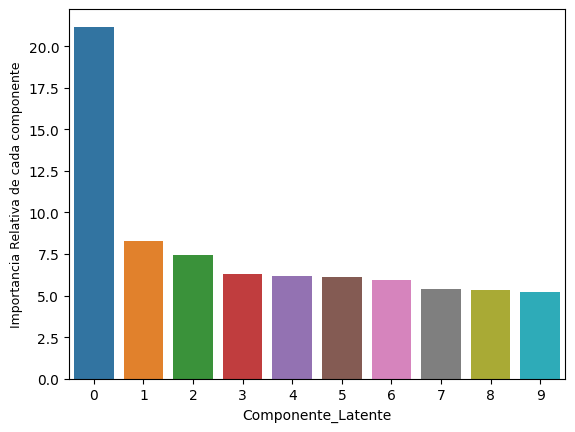

In [ ]:
#sns.set(rc={'figure.figsize':(3,3)}) 
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Componente_Latente', fontdict={'size': 10})
chart.set_ylabel('Importancia Relativa de cada componente', fontdict={'size': 9})
plt.show()

In [ ]:
lsi_term_topic = V_T 

print(lsi_term_topic.shape)

(12384, 10)


In [ ]:
# rescatemos los nombres de los términos/tokens:

term_names = feature_names

print(term_names)

['abad', 'abadía', 'abajo', 'abanderar', 'abandonado', 'abandonar', 'abandono', 'abanico', 'abaratar', 'abarcar', 'abarrotado', 'abascal', 'abastecer', 'abastecimiento', 'abasto', 'abatido', 'abatir', 'abc', 'abdicación', 'abdicar', 'abel', 'aber', 'aberración', 'abertzale', 'abiertamente', 'abierto', 'abismo', 'abocado', 'abocar', 'abogacía', 'abogada', 'abogado', 'abogar', 'abolicionista', 'abolición', 'abolir', 'abonado', 'abonar', 'abono', 'abordaje', 'abordar', 'abordir', 'abordo', 'abortar', 'aborto', 'about', 'abran', 'abrazar', 'abrazo', 'abrigo', 'abril', 'abrir', 'abrumador', 'abrupto', 'absolución', 'absolutamente', 'absoluto', 'absolver', 'absorber', 'absorción', 'abstención', 'abstener', 'abstracto', 'absuelto', 'absurdo', 'abu', 'abuela', 'abuelo', 'abultado', 'abundancia', 'abundante', 'abundar', 'aburrido', 'aburrir', 'abusar', 'abusivo', 'abuso', 'acabado', 'acabar', 'academia', 'académico', 'acaecido', 'acallar', 'acampada', 'acaparar', 'acarrear', 'acaso', 'acatar', 

In [ ]:
# Y generamos un DataFrame con la matriz term-topic:

term_topic_matrix = pd.DataFrame(data=lsi_term_topic, 
                                 index = term_names,   
                                 columns = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]
                                )

print(term_topic_matrix.shape)   #  words X topics

(12384, 10)


In [ ]:
term_topic_matrix

,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
abad,0.000814,-0.000969,-0.000577,0.001257,0.000369,0.000111,-0.000527,0.000019,0.000630,-0.000382
abadía,0.000513,-0.001006,-0.000514,0.000280,-0.000060,0.000146,0.000653,-0.000138,-0.000369,-0.000625
abajo,0.002840,-0.001832,-0.005737,0.000790,-0.000399,0.001048,-0.001765,0.001599,-0.000037,0.001866
abanderar,0.000567,-0.001264,0.000690,-0.001096,-0.000316,0.000765,-0.000080,-0.000641,0.000280,-0.000526
abandonado,0.002193,-0.000700,-0.003721,0.000895,-0.001372,-0.000035,-0.000231,0.000267,0.001114,-0.000325
...,...,...,...,...,...,...,...,...,...,...
último,0.057067,0.083922,0.024521,0.031433,0.014869,0.094139,0.026464,-0.005952,-0.014701,-0.038132
única,0.000471,-0.000305,0.000041,-0.000058,0.001134,0.000323,-0.000091,-0.000563,0.000050,0.000512
únicamente,0.004768,-0.000265,-0.001026,0.002052,-0.001568,-0.000912,-0.000311,0.002243,-0.002849,-0.003687
único,0.023145,-0.014938,-0.003181,-0.006603,-0.004236,0.007775,0.000114,0.012971,-0.008084,0.001809
